In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
Image_size=256
Batch_size=32
dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/data/PlantVillage",
                                                    shuffle=True,
                                                    image_size=(Image_size,Image_size),
                                                    batch_size=32
                                                    )



Found 2152 files belonging to 3 classes.


In [3]:
classnames=dataset.class_names
print(classnames)
Epochs=50
Channel=3

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


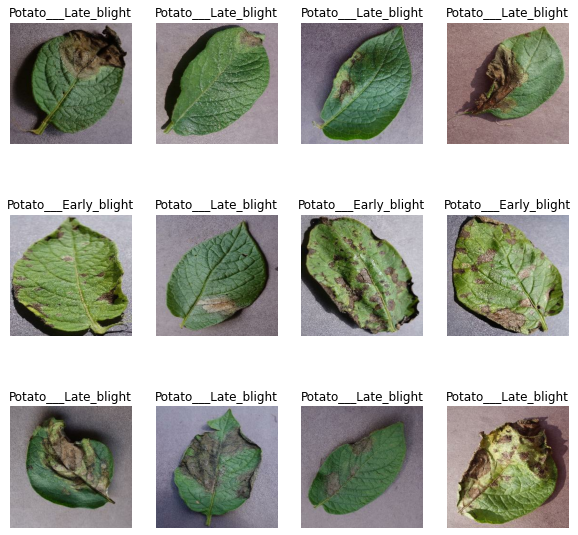

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  #print(image_batch.shape)
  #To print images use plt.imshow
  #print(label_batch.numpy())
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))# Convert to int 
    plt.title(classnames[label_batch[i]])
    plt.axis('off')

In [ ]:
dataset=dataset.shuffle(1000,seed=12)
train_set=0.8
train_size=int(len(dataset)*train_set)
train_ds=dataset.take(train_size)
len(train_ds)

val_set=0.1
val_size=int(len(dataset)*val_set)
val_ds=dataset.skip(train_size).take(val_size)
len(val_ds)


test_ds=dataset.skip(train_size).skip(val_size)
len(test_ds)

8

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) #Load in cpu when gpu is training 
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
                     layers.experimental.preprocessing.Resizing(Image_size,Image_size),
                     layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
                     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                     layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
# inputshape=(Batch_size,Image_size,Image_size,Channel)
# N_classes=3
# model=models.Sequential([resize_and_rescale,
#                          data_augmentation,
#                          layers.Conv2D(32,(3,3),activation='relu',input_shape=(Batch_size,Image_size,Image_size,Channel)),
#                          layers.MaxPooling2D((2,2)),
                         
#                          layers.Conv2D(64,(2,2),activation='relu'),
#                          layers.MaxPooling2D((3,3)),
                         
#                          layers.Conv2D(64,(3,3),activation='relu'),
#                          layers.MaxPooling2D((2,2)),
                         
#                          layers.Conv2D(32,(2,2),activation='relu'),
#                          layers.MaxPooling2D((3,3)),
#                          layers.Flatten(),
#                          layers.Dense(64,activation='relu'),
#                          layers.Dense(N_classes,activation='softmax')
                         
                         
#                          ])
# model.build(input_shape=inputshape)





input_shape = (Batch_size, Image_size,Image_size,Channel)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=25,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/25
54/54 [==============================] - 203s 4s/step - loss: 0.8982 - accuracy: 0.4936 - val_loss: 0.9140 - val_accuracy: 0.4792
Epoch 2/25
54/54 [==============================] - 195s 4s/step - loss: 0.7535 - accuracy: 0.6487 - val_loss: 0.4778 - val_accuracy: 0.8229
Epoch 3/25
54/54 [==============================] - 196s 4s/step - loss: 0.4070 - accuracy: 0.8328 - val_loss: 0.2289 - val_accuracy: 0.9219
Epoch 4/25
54/54 [==============================] - 198s 4s/step - loss: 0.2728 - accuracy: 0.8877 - val_loss: 0.1348 - val_accuracy: 0.9479
Epoch 5/25
54/54 [==============================] - 199s 4s/step - loss: 0.1947 - accuracy: 0.9236 - val_loss: 0.0970 - val_accuracy: 0.9688
Epoch 6/25
54/54 [==============================] - 193s 4s/step - loss: 0.1907 - accuracy: 0.9265 - val_loss: 0.1275 - val_accuracy: 0.9583
Epoch 7/25
54/54 [==============================] - 190s 4s/step - loss: 0.1120 - accuracy: 0.9630 - val_loss: 0.1397 - val_accuracy: 0.9531
Epoch 8/25
54

In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 13s 910ms/step - loss: 0.0017 - accuracy: 1.0000


In [ ]:
history.params
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

len(val_acc)

25

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


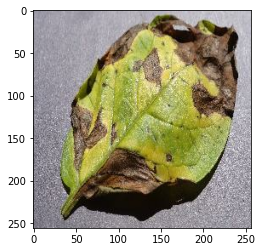

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",classnames[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",classnames[np.argmax(batch_prediction[0])])

ValueError: ignored

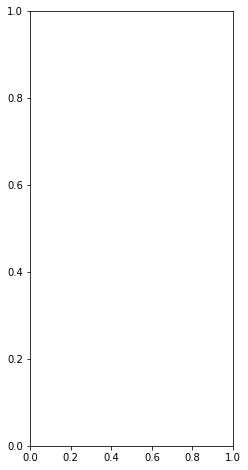

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
#Interference
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classnames[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

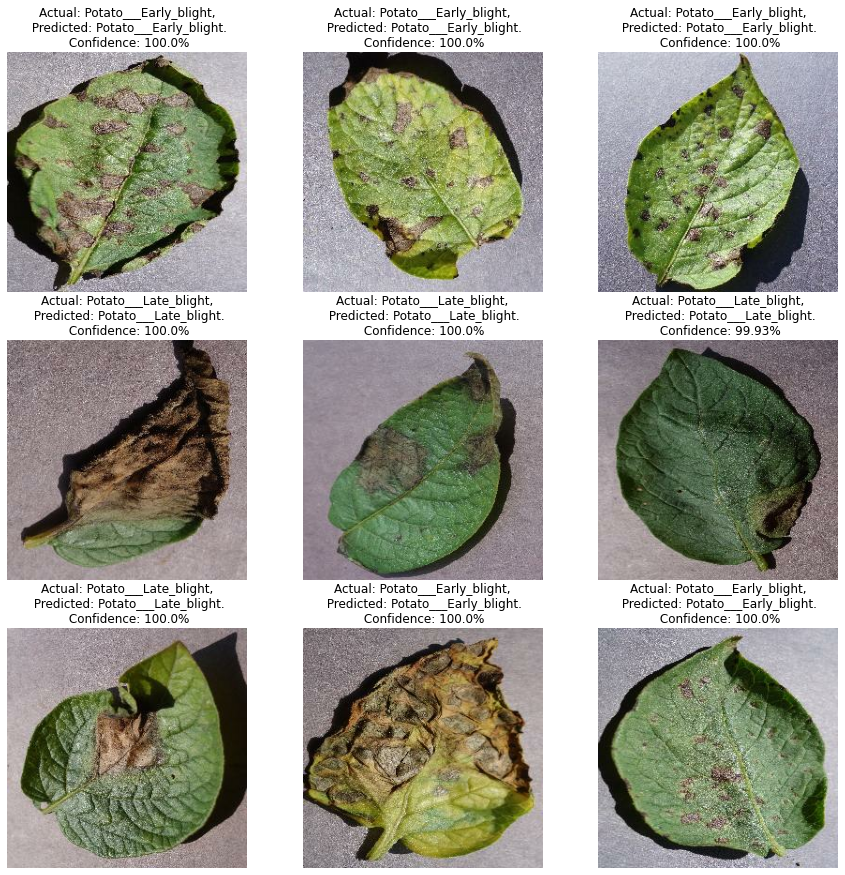

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classnames[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("/content/drive/MyDrive/dl") + [0]])+1
model.save(f"/content/drive/MyDrive/dl/models/{model_version}")


INFO:tensorflow:Assets written to: /content/drive/MyDrive/dl/models/1/assets


In [ ]:
model.save("/content/drive/MyDrive/dl/potatoes.h5")